In [ ]:
!pip install pydicom dicom_numpy SimpleITK
#lungmask


Defaulting to user installation because normal site-packages is not writeable
  Using cached simpleitk-2.5.0.tar.gz (2.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

In [1]:
import pandas as pd
import numpy as np

import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pydicom
from pydicom import dcmread
# import dicom_numpy
from mpl_toolkits.mplot3d import Axes3D
#import lungmask

In [2]:
dicom_df = pd.read_csv('../../../scratch/bds/OSIC/DICOM_file_all.csv')

In [3]:
dicom_df.loc[0, ['Path', 'source_path']]
dicom_path = dicom_df['source_path'][0]+ '/' + dicom_df['Path'][0][2:]

In [4]:
print(dicom_path)

../../../scratch/bds/OSIC/587713/dde15463-ece9-4cd5-aebd-60b23cc1569a/1.2.840.113704.1.111.1636.1412937710.12/


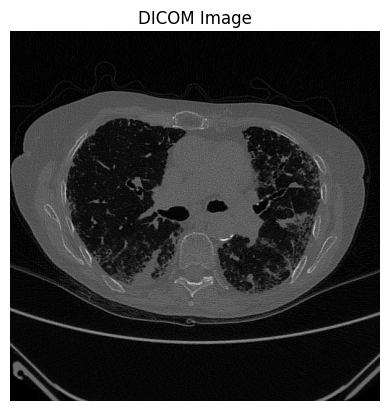

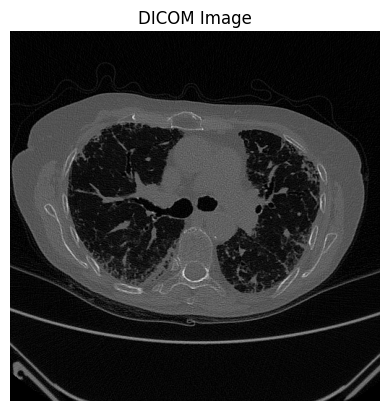

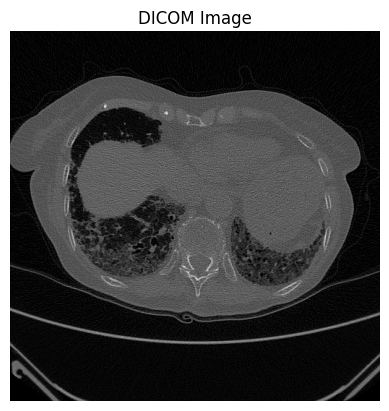

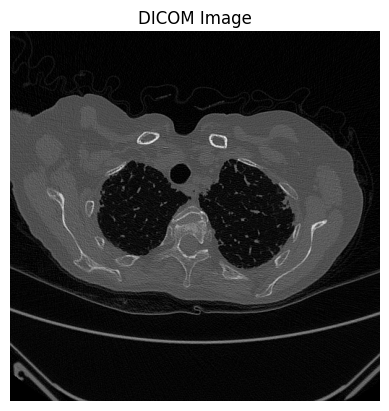

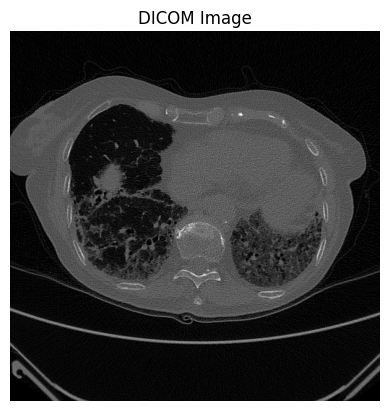

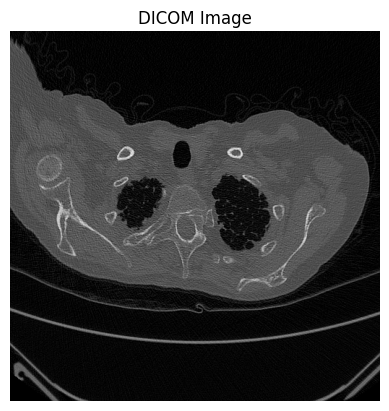

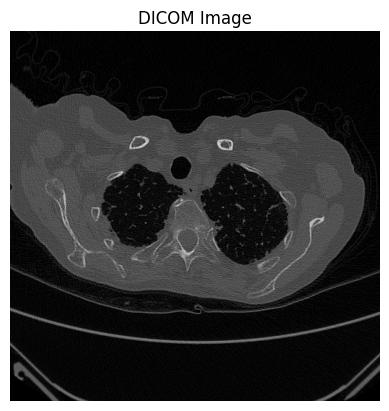

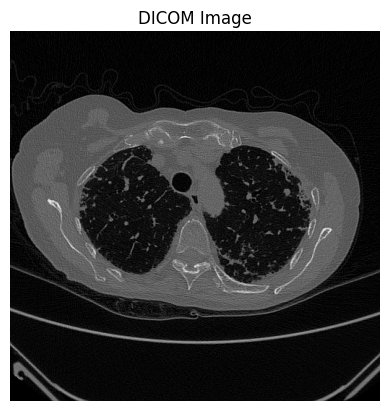

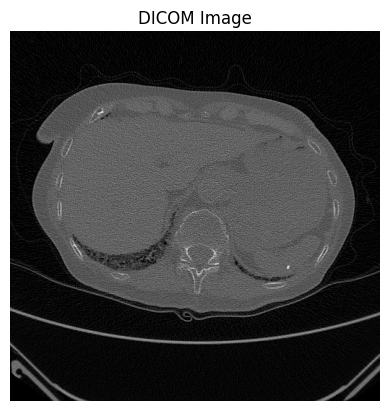

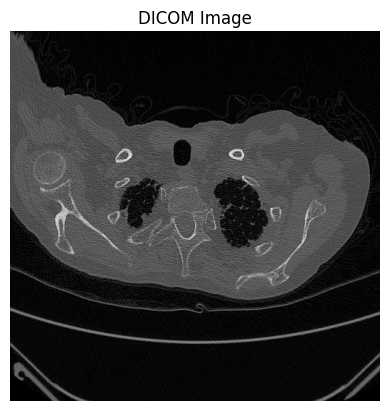

In [6]:
dicom_files = []
dicom_root = []

for root, dirs, files in os.walk(dicom_path):
	for f in files:
		if f.endswith(".dcm"):
			dicom_files.append(dcmread(os.path.join(root, f)))
			dicom_root.append(os.path.join(root, f))

for file in dicom_files[:10]:
	# Plot the image
	plt.imshow(file.pixel_array, cmap=plt.cm.gray)
	plt.title("DICOM Image")
	plt.axis('off')
	plt.show()


In [7]:
print(len(dicom_files))

611


In [11]:
pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 38.2 MB/s  0:00:01m0:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
import SimpleITK as sitk
dicom_path = '../../../scratch/bds/OSIC/587713/dde15463-ece9-4cd5-aebd-60b23cc1569a/1.2.840.113704.1.111.1636.1412937710.12/AXIAL/dicom/'

series_files = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(dicom_path)
print(f"Number of DICOM files: {len(series_files)}")
image = sitk.ReadImage(series_files)
print(image.GetSize())

Number of DICOM files: 611
(512, 512, 611)


In [11]:
!pip install ipywidgets myshow

  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
ERROR: Could not find a version that satisfies the requirement myshow (from versions: none)
ERROR: No matching distribution found for myshow


## Source code: 
https://hub.gesis.mybinder.org/user/insightsoftware-leitk-notebooks-7l6ea1z1/lab/tree/Python/300_Segmentation_Overview.ipynb

In [9]:
img_T1_255 = sitk.Cast(sitk.RescaleIntensity(image), sitk.sitkUInt8)


In [12]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
from ipywidgets import interact
#%matplotlib widget

# =========================================================================
#
#  Copyright NumFOCUS
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#         http://www.apache.org/licenses/LICENSE-2.0.txt
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
#
# =========================================================================
import SimpleITK as sitk
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive
from ipywidgets import widgets


def myshow(img, title=None, margin=0.05, dpi=80, cmap="gray"):
    nda = sitk.GetArrayFromImage(img)

    spacing = img.GetSpacing()
    slicer = False

    if nda.ndim == 3:
        # fastest dim, either component or x
        c = nda.shape[-1]

        # the the number of components is 3 or 4 consider it an RGB image
        if not c in (3, 4):
            slicer = True

    elif nda.ndim == 4:
        c = nda.shape[-1]

        if not c in (3, 4):
            raise RuntimeError("Unable to show 3D-vector Image")

        # take a z-slice
        slicer = True

    if slicer:
        ysize = nda.shape[1]
        xsize = nda.shape[2]
    else:
        ysize = nda.shape[0]
        xsize = nda.shape[1]

    # Make a figure big enough to accommodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (1 + margin) * ysize / dpi, (1 + margin) * xsize / dpi

    def callback(z=None):
        extent = (0, xsize * spacing[1], ysize * spacing[0], 0)

        fig = plt.figure(figsize=figsize, dpi=dpi)

        # Make the axis the right size...
        ax = fig.add_axes([margin, margin, 1 - 2 * margin, 1 - 2 * margin])

        if z is None:
            ax.imshow(nda, extent=extent, interpolation=None, cmap=cmap)
        else:
            ax.imshow(nda[z, ...], extent=extent, interpolation=None, cmap=cmap)

        if title:
            plt.title(title)

        plt.show()

    if slicer:
        interact(callback, z=(0, nda.shape[0] - 1))
    else:
        callback()


def myshow3d(img, xslices=[], yslices=[], zslices=[], title=None, margin=0.05, dpi=80):
    size = img.GetSize()
    img_xslices = [img[s, :, :] for s in xslices]
    img_yslices = [img[:, s, :] for s in yslices]
    img_zslices = [img[:, :, s] for s in zslices]

    maxlen = max(len(img_xslices), len(img_yslices), len(img_zslices))

    img_null = sitk.Image([0, 0], img.GetPixelID(), img.GetNumberOfComponentsPerPixel())

    img_slices = []
    d = 0

    if len(img_xslices):
        img_slices += img_xslices + [img_null] * (maxlen - len(img_xslices))
        d += 1

    if len(img_yslices):
        img_slices += img_yslices + [img_null] * (maxlen - len(img_yslices))
        d += 1

    if len(img_zslices):
        img_slices += img_zslices + [img_null] * (maxlen - len(img_zslices))
        d += 1

    if maxlen != 0:
        if img.GetNumberOfComponentsPerPixel() == 1:
            img = sitk.Tile(img_slices, [maxlen, d])
        # TODO check in code to get Tile Filter working with VectorImages
        else:
            img_comps = []
            for i in range(0, img.GetNumberOfComponentsPerPixel()):
                img_slices_c = [sitk.VectorIndexSelectionCast(s, i) for s in img_slices]
                img_comps.append(sitk.Tile(img_slices_c, [maxlen, d]))
            img = sitk.Compose(img_comps)

    myshow(img, title, margin, dpi)

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
myshow3d(image)

In [ ]:
seg = image > 30
myshow(sitk.LabelOverlay(img_T1_255, seg), "Basic Thresholding")

In [ ]:
seed = (132, 142, 96)
seg = sitk.Image(image.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(image)
seg[seed] = 1
seg = sitk.BinaryDilate(seg, [3] * 3)
myshow(sitk.LabelOverlay(img_T1_255, seg), "Initial Seed")

In [ ]:
def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

In [ ]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)

In [ ]:
dicom_path = '../../../scratch/bds/OSIC/587713/dde15463-ece9-4cd5-aebd-60b23cc1569a/1.2.840.113704.1.111.1636.1412937710.12/AXIAL/dicom/'

def load_dicom(directory):
    slices = [pydicom.dcmread(os.path.join(directory, f)) for f in os.listdir(directory) if f.endswith('.dcm')]
    slices.sort(key=lambda x: float(x.ImagePositionPatient[2]))
    volume = np.stack([s.pixel_array for s in slices], axis=-1)
    return volume.astype(np.float32)

import numpy as np
from scipy.ndimage import gaussian_filter
from skimage.exposure import rescale_intensity

def preprocess_volume(volume, sigma=1):
    # Normalize the volume to [0, 1] range
    volume = (volume - np.min(volume)) / (np.max(volume) - np.min(volume))
    
    # Apply Gaussian filter
    volume = gaussian_filter(volume, sigma=sigma)
    
    # Rescale intensity to ensure values are within the range [0, 1]
    volume = rescale_intensity(volume, in_range='image', out_range=(0, 1))
    
    return volume

In [ ]:
volume = load_dicom(dicom_path)
pre_volume = preprocess_volume(volume)

In [ ]:
seg_array = sitk.GetArrayFromImage(image)
multi_slice_viewer(seg_array)
multi_slice_viewer(pre_volume)
multi_slice_viewer(volume)

In [ ]:
image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)


class IndexTracker:
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def on_scroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slicescmapcmap
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()


fig, ax = plt.subplots(1, 1)

X = np.random.rand(20, 20, 40)

tracker = IndexTracker(ax, X)


fig.canvas.mpl_connect('figure_enter_event', tracker.on_scroll)
plt.show()

In [ ]:
ax.plot(np.random.rand(100), 'o', picker=5)  # 5 points tolerance

def on_pick(event):
    line = event.artist
    xdata, ydata = line.get_data()
    ind = event.ind
    print(f'on pick line: {xdata[ind]:.3f}, {ydata[ind]:.3f}')

fig.canvas.mpl_connect('pick_event', on_pick)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


class IndexTracker:
    def __init__(self, ax, X):
        self.index = 0
        self.X = X
        self.ax = ax
        self.im = ax.imshow(self.X[:, :, self.index])
        self.update()

    def on_scroll(self, event):
        print(event.button, event.step)
        increment = 1 if event.button == 'up' else -1
        max_index = self.X.shape[-1] - 1
        self.index = np.clip(self.index + increment, 0, max_index)
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.index])
        self.ax.set_title(
            f'Use scroll wheel to navigate\nindex {self.index}')
        self.im.axes.figure.canvas.draw()


x, y, z = np.ogrid[-10:10:100j, -10:10:100j, 1:10:20j]
X = np.sin(x * y * z) / (x * y * z)

fig, ax = plt.subplots()
# create an IndexTracker and make sure it lives during the whole
# lifetime of the figure by assigning it to a variable
tracker = IndexTracker(ax, X)

fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
plt.show()